In [96]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# EDA


## 1. Data Collection

In [97]:
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

df.columns = [col.replace(' ', '_') for col in df.columns]
df_labels = df.drop(columns={'target'})
df_target = df.target


## 2. Data Cleaning

### Checking the `Data Type `

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

### Checking `Null Values`

In [101]:
null_sum = df.isnull().sum()
count_rows = df.count()
null_percentage = ( null_sum / count_rows ) * 100
null_df = pd.DataFrame({'Null Count': null_sum, 'Total Count': count_rows, 'Null Percentage': null_percentage})
null_df

,Null Count,Total Count,Null Percentage
mean_radius,0,569,0.0
mean_texture,0,569,0.0
mean_perimeter,0,569,0.0
mean_area,0,569,0.0
mean_smoothness,0,569,0.0
mean_compactness,0,569,0.0
mean_concavity,0,569,0.0
mean_concave_points,0,569,0.0
mean_symmetry,0,569,0.0
mean_fractal_dimension,0,569,0.0


### Checking for `Outliers`

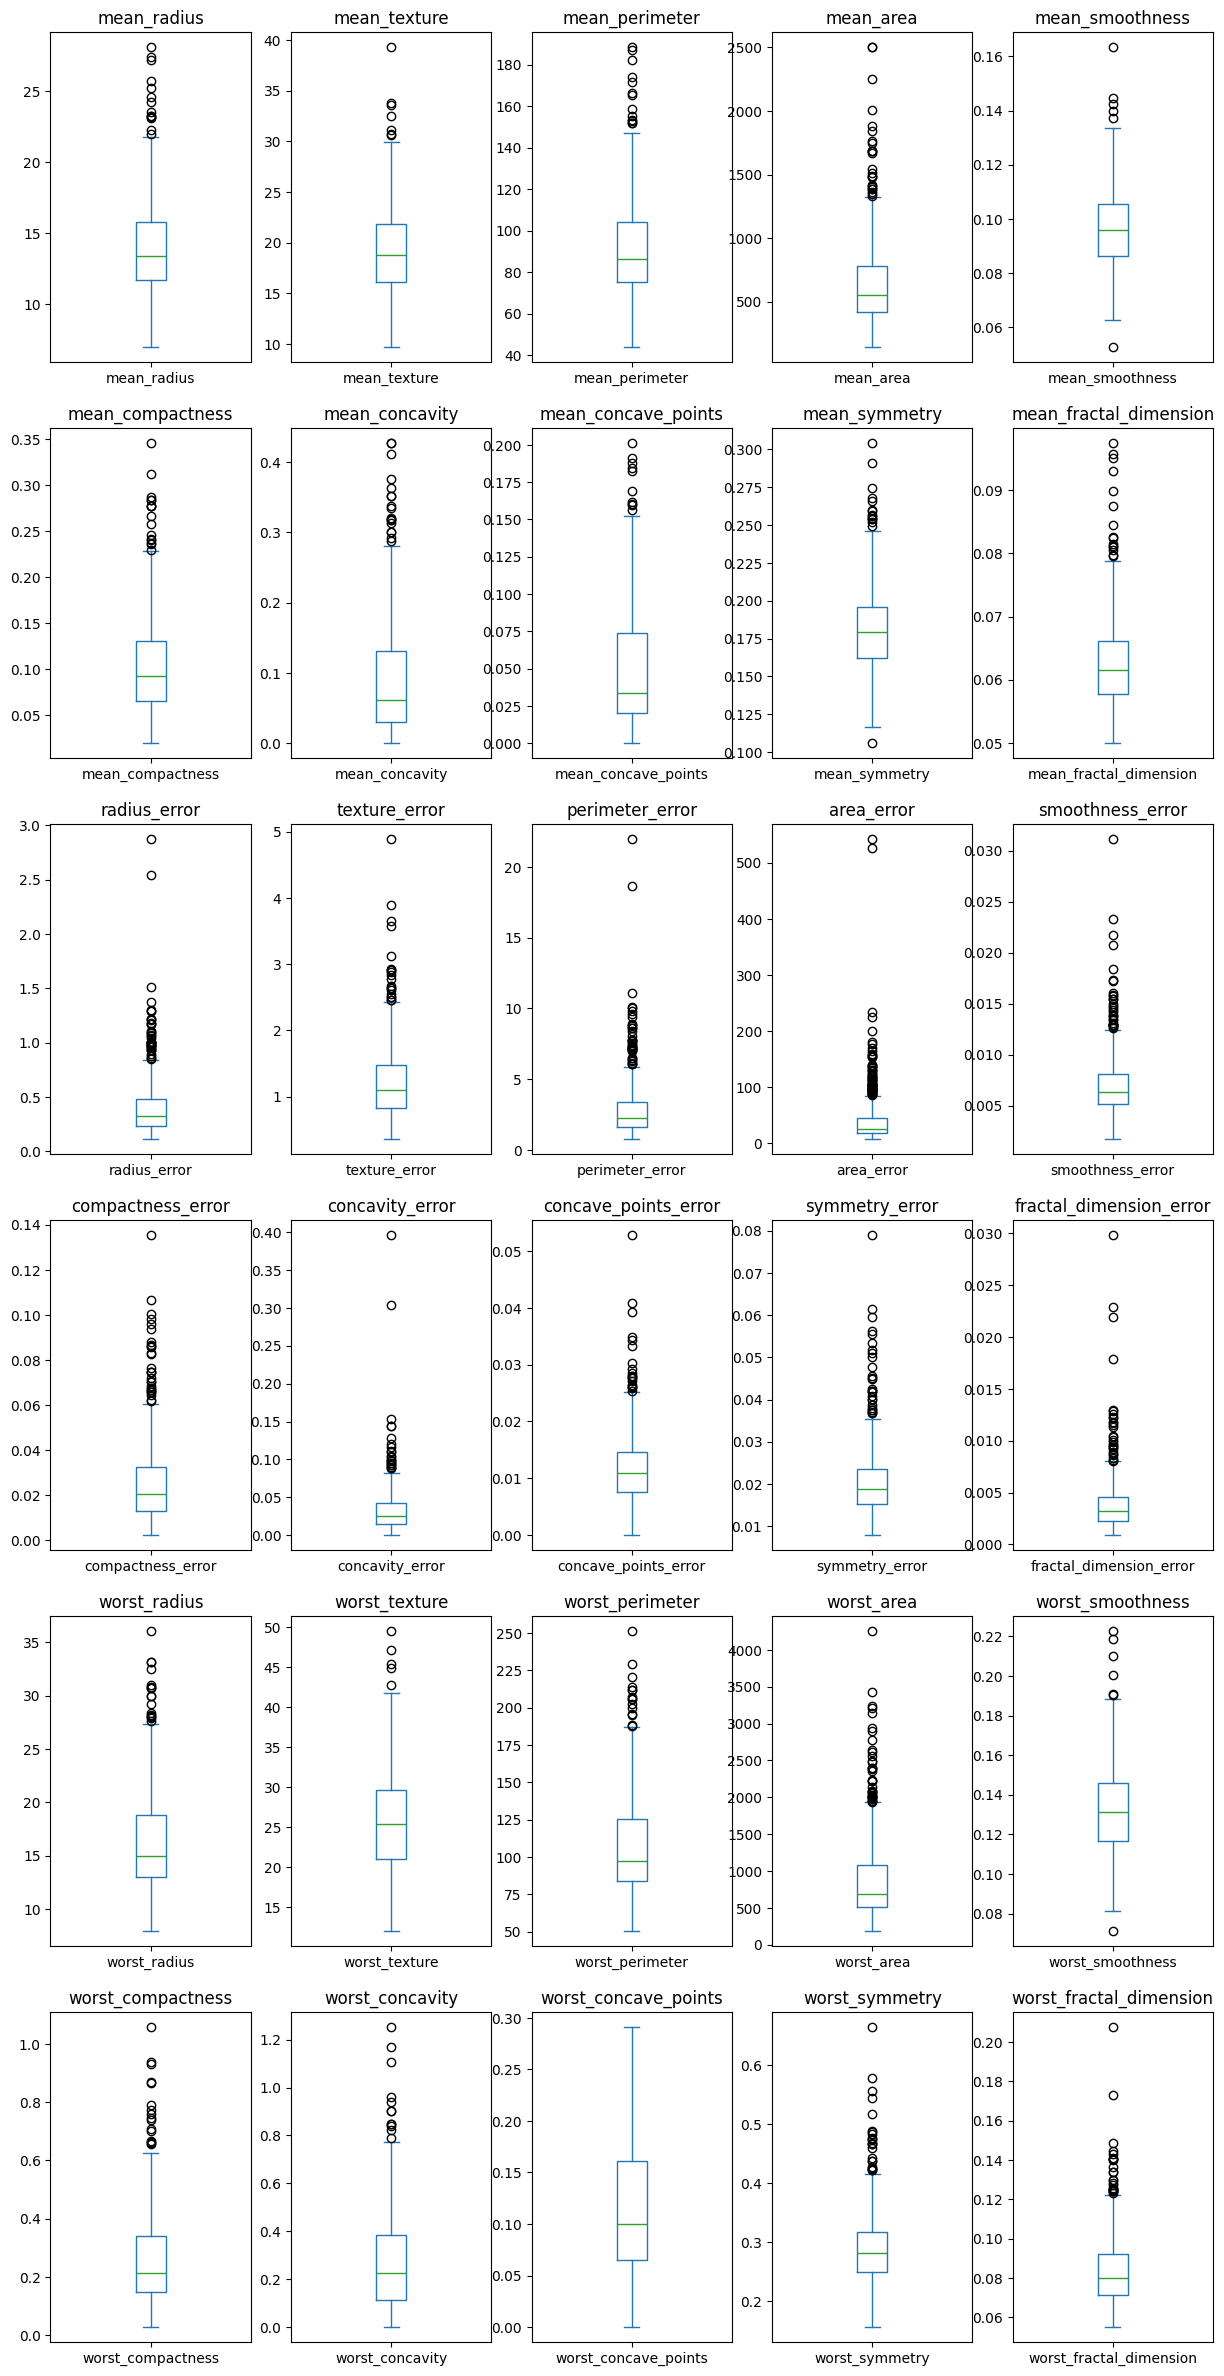

In [107]:
num_cols = 5
num_rows = (df_labels.shape[1] + num_cols - 1) //num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, ax in enumerate(axes.flatten()):
    if i < df_labels.shape[1]:
        df_labels.iloc[:, i].plot(kind='box',ax=ax)
        ax.set_title(df_labels.columns[i])

## 3. Descriptive Statistics

### Checking the `Distribution` of the Dataset

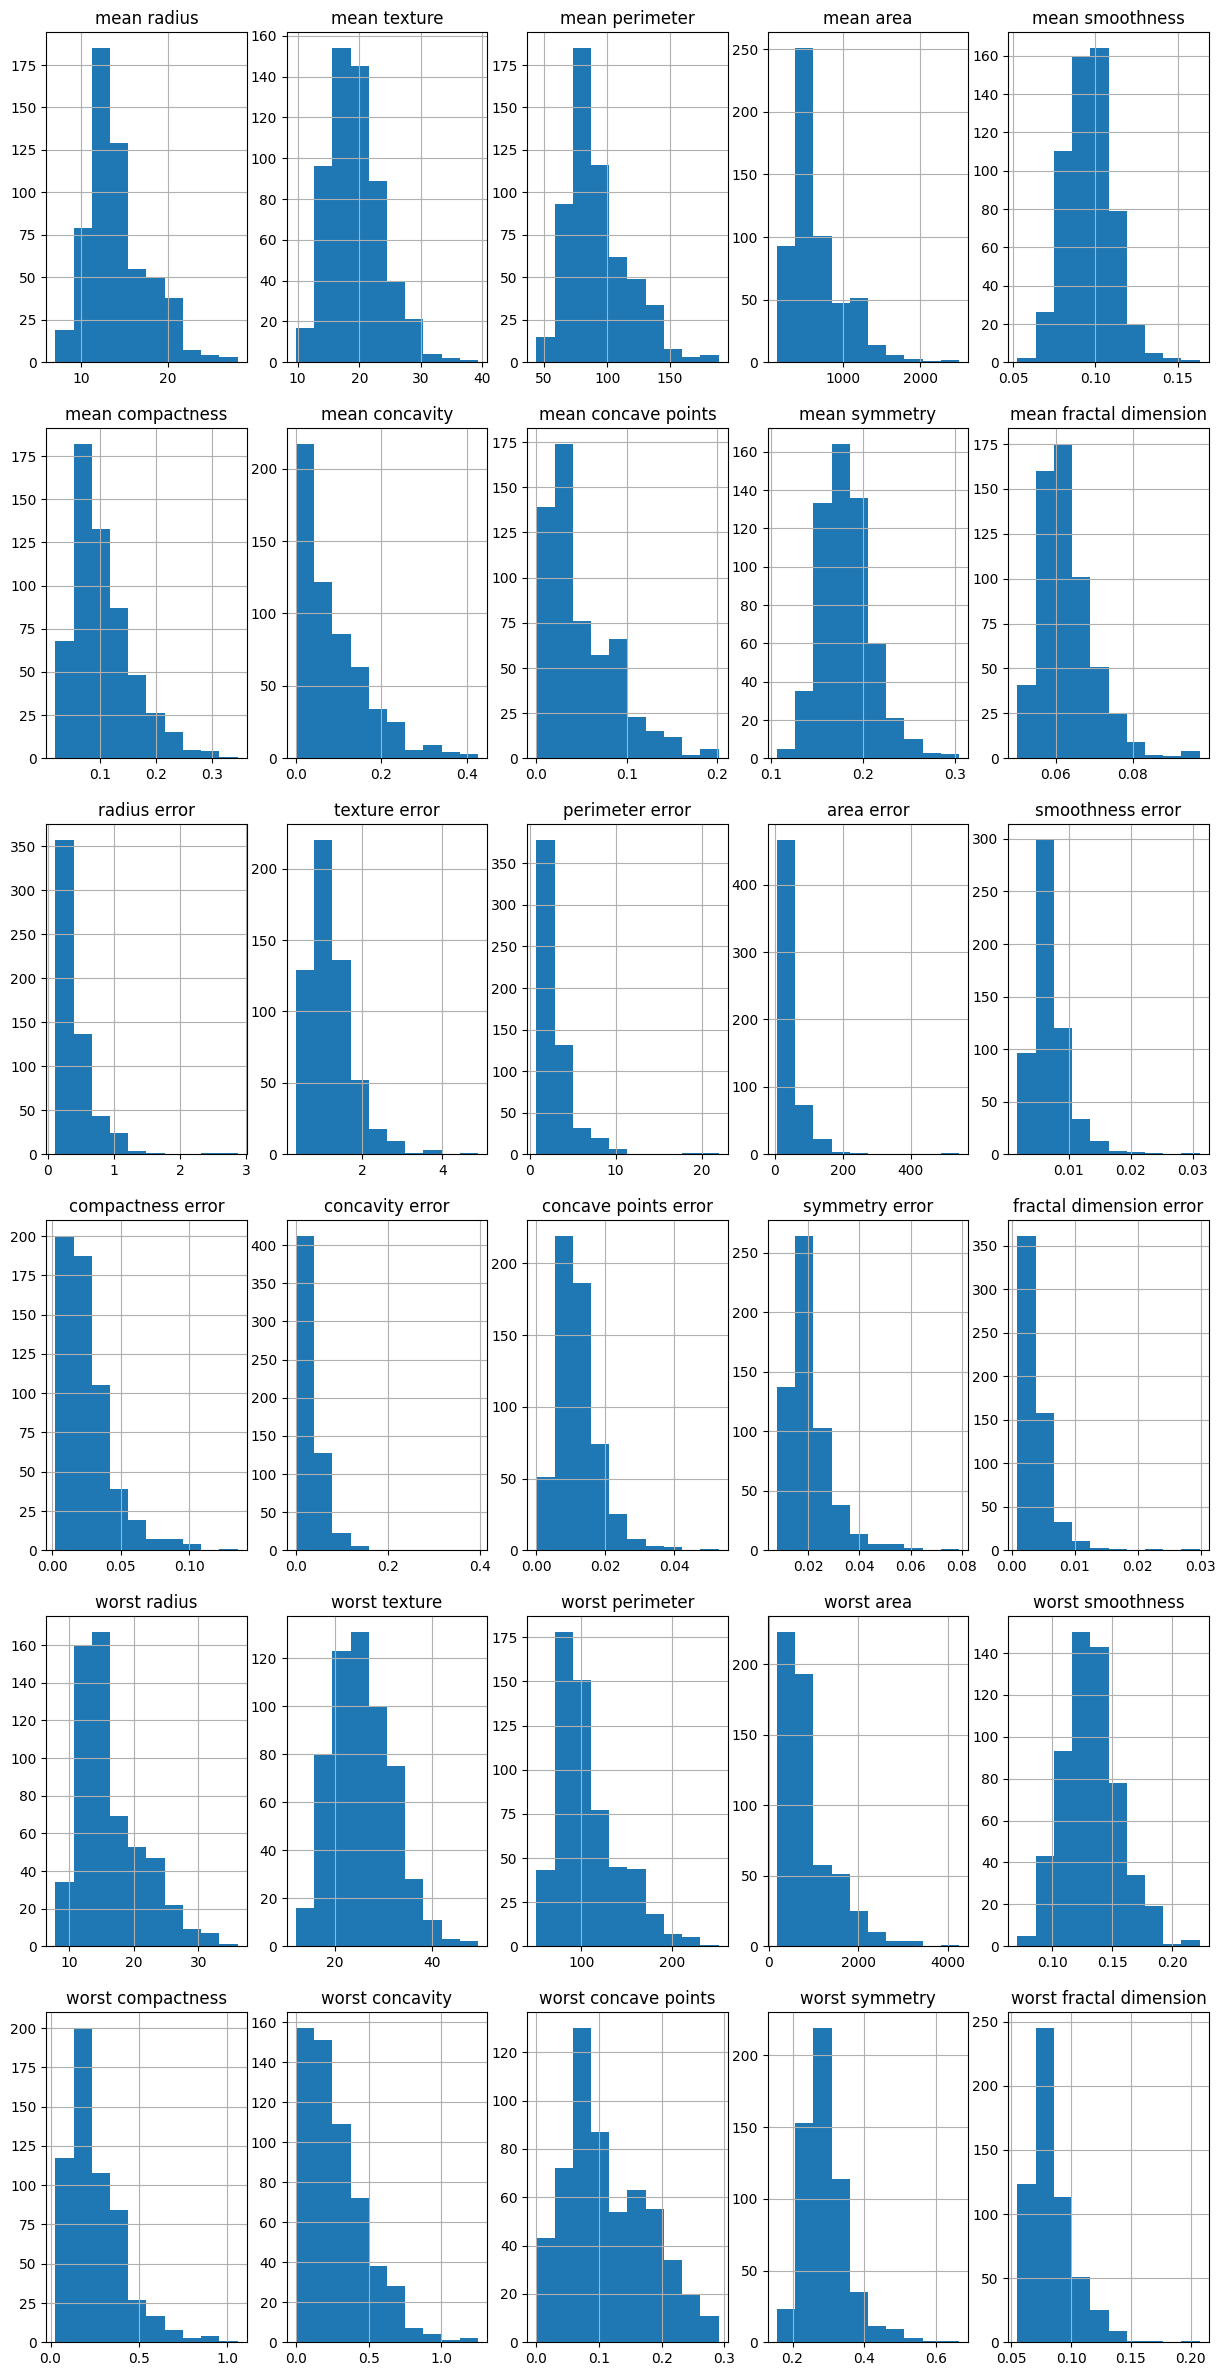

In [60]:
num_cols = 5
num_rows = (df_labels.shape[1] + num_cols - 1) //num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, ax in enumerate(axes.flatten()):
    if i < df_labels.shape[1]:
        df_labels.iloc[:, i].hist(ax=ax)
        ax.set_title(df_labels.columns[i])


In [68]:
from scipy.stats import skew
skewness = skew(df_labels)
print("Skewness of the dataset:")
print(skewness)

Skewness of the dataset:
[0.93989345 0.64873357 0.98803695 1.64139051 0.45511992 1.18698332
 1.39748324 1.16809035 0.72369472 1.30104739 3.08046399 1.64210026
 3.43453047 5.43281586 2.30834422 1.89720239 5.09698095 1.44086689
 2.18934184 3.91361665 1.10020504 0.49700667 1.12518762 1.85446799
 0.41433005 1.46966746 1.14720234 0.49131594 1.43014487 1.65819316]


In [69]:
skewness = df_labels.skew()
print("Skewness of the dataset:")
print(skewness)

Skewness of the dataset:
mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
wor

In [118]:
17 *17

289

: 